In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

lat0,lat1 = -5,5
lon0,lon1 = 143,153
h = "h3"

In [2]:
feb = [ "02-%02d"%(i+1) for i in range(28) ]
dates = ["01-30", "01-31"]+ feb
ds = xr.open_dataset(ap.test_data_file_name(h, dates[0])).drop(["P3_input_dim","P3_output_dim","ilev","lev","swband","lwband", "slat","slon"])

for date in dates[1:]:
    file = ap.test_data_file_name(h, date)
    print(file)
    ds_1 = xr.open_dataset(file).drop(["P3_input_dim","P3_output_dim","ilev","lev","swband","lwband", "slat","slon"])
    ds = xr.combine_by_coords([ds, ds_1], combine_attrs="drop")
    # print(ds)




/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-01-31-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-01-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-02-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-03-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-04-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-05-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-06-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h3.2020-02-07-00000.nc
/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne

In [3]:

ds = ds.sel(lat=slice(lat0, lat1)).sel(lon=slice(lon0,lon1))
ds

<xarray.Dataset>
Dimensions:       (ilev: 129, lat: 14, lev: 128, lon: 14, nbnd: 2, slat: 255, time: 2880)
Coordinates:
  * lat           (lat) float64 -4.588 -3.882 -3.176 ... 3.176 3.882 4.588
  * lon           (lon) float64 143.4 144.1 144.8 145.5 ... 151.2 151.9 152.6
  * time          (time) object 2020-01-30 00:00:00 ... 2020-02-28 23:45:00
Dimensions without coordinates: ilev, lev, nbnd, slat
Data variables:
    w_stag        (time, slat) float64 7.589e-05 0.0002277 ... 7.589e-05
    lat_bnds      (time, lat, nbnd) float64 -4.941 -4.235 -4.235 ... 4.235 4.941
    lon_bnds      (time, lon, nbnd) float64 143.1 143.8 143.8 ... 152.2 152.9
    gw            (time, lat) float64 0.01228 0.01229 0.0123 ... 0.01229 0.01228
    area          (time, lat, lon) float64 0.0001507 0.0001507 ... 0.0001507
    OMEGA200      (time, lat, lon) float32 -0.15020059 0.14563699 ... -0.2078508
    OMEGA500      (time, lat, lon) float32 -0.19874135 ... -0.62911755
    OMEGA700      (time, lat, lon) float32 0.103398874 ... -0.5217593
    OMEGA850      (time, lat, lon) float32 0.1741215 0.03878491 ... -0.5598401
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    RH200         (time, lat, lon) float32 43.079815 51.102184 ... 58.45308
    RH500         (time, lat, lon) float32 71.216194 71.12099 ... 19.255718
    RH700         (time, lat, lon) float32 61.362892 59.117466 ... 34.734676
    RH850         (time, lat, lon) float32 75.41229 76.39876 ... 82.19037
    Z200          (time, lat, lon) float32 12497.42 12494.259 ... 12494.3
    Z500          (time, lat, lon) float32 5880.4976 5881.271 ... 5876.6943
    Z700          (time, lat, lon) float32 3140.8403 3139.5635 ... 3143.147
    Z850          (time, lat, lon) float32 1486.0958 1485.1455 ... 1496.0548
    ch4vmr        (time) float64 1.808e-06 1.808e-06 ... 1.808e-06 1.808e-06
    co2vmr        (time) float64 0.000379 0.000379 ... 0.000379 0.000379
    date          (time) int32 20200130 20200130 20200130 ... 20200228 20200228
    date_written  (time) |S8 b'11/30/20' b'11/30/20' ... b'12/12/20' b'12/12/20'
    datesec       (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    f11vmr        (time) float64 7.688e-10 7.688e-10 ... 7.688e-10 7.688e-10
    f12vmr        (time) float64 5.313e-10 5.313e-10 ... 5.313e-10 5.313e-10
    hyai          (time, ilev) float64 0.002255 0.002905 ... 9.235e-05 0.0
    hyam          (time, lev) float64 0.00258 0.00323 ... 0.0001556 4.618e-05
    hybi          (time, ilev) float64 0.0 0.0 0.0 0.0 ... 0.9927 0.9969 1.0
    hybm          (time, lev) float64 0.0 0.0 0.0 0.0 ... 0.9907 0.9948 0.9985
    mdt           (time) int32 75 75 75 75 75 75 75 75 ... 75 75 75 75 75 75 75
    n2ovmr        (time) float64 3.231e-07 3.231e-07 ... 3.231e-07 3.231e-07
    nbdate        (time) int32 20200120 20200120 20200120 ... 20200120 20200120
    nbsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    ndcur         (time) int32 10 10 10 10 10 10 10 10 ... 39 39 39 39 39 39 39
    nsbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nscur         (time) int32 0 900 1800 2700 3600 ... 82800 83700 84600 85500
    nsteph        (time) int32 11520 11532 11544 11556 ... 46044 46056 46068
    sol_tsi       (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    time_bnds     (time, nbnd) object 2020-01-29 23:45:00 ... 2020-02-28 23:4...
    time_written  (time) |S8 b'14:40:16' b'15:11:47' ... b'05:52:39' b'05:55:14'

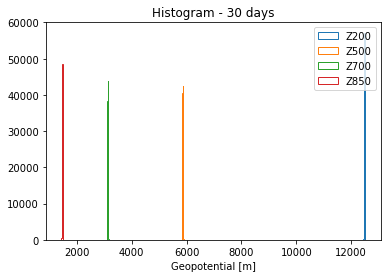

In [6]:
#plotting
fig, ax = plt.subplots(1,1,figsize=(6,4))
log=False
t=0

## h0
# bins=np.linspace(0.01,1,20)
# vars = ["CLDTOT","CLDHGH","CLDMED","CLDLOW"]
# bins = np.linspace(-5,1,25)
# vars = ["TMCLDICE", "TMCLDLIQ", "TMCLDRIM", "TMRAINQM"]
# vmin, vmax = -5, 1
# vars = ["CAPE", "CIN"]
# bins=30

## h1
# vars = ["LHFLX", "SHFLX"]
# vars = ["PRECSL", "PRECT"]
# vars = ["QREFHT"]
# vars = ["TREFHT"]
# vars = ["TAUX", "TAUY"]
# vars =  ["WINDSPD_10M"]
# vars = ["PS"]
bins=30

## h2
# vars = ["FLDS", "FLNS", "FSDS", "FSNS"]
# vars = ["FLNT", "FLNTC"]
# vars = ["FSNTOA", "FSNTOAC"]

## h3
# vars = ["OMEGA200", "OMEGA500", "OMEGA700", "OMEGA850"]
# vars = ["RH200", "RH500", "RH700", "RH850"]
vars = ["Z200", "Z500", "Z700", "Z850"]


#histogram
for v in vars:
    if log:
        np.log10(ds[v]).plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
    else:
        ds[v].plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
plt.legend()
plt.title("Histogram - 30 days")
plt.show()

# plot snapshot on latlon
# fig, ax = plt.subplots(1, len(vars), figsize=(3*len(vars),3), sharey=True, sharex=True)
# for i,axi in enumerate(ax):
#     if log:
#         np.log10(ds[vars[i]][t]).plot.contourf(ax=ax[i], vmin=vmin, vmax=vmax)
#     else:
#         ds[vars[i]][t].plot.contourf(ax=ax[i])
#     axi.set_ylabel("Lat")
#     axi.set_xlabel("Lon")
#     axi.set_title(vars[i])
# fig.suptitle(ds.time[t].values)
# plt.tight_layout()
# plt.show()

In [8]:
# vars = ["LHFLX", "SHFLX", "PRECSL", "PRECT", "QREFHT", "TREFHT", "TAUX", "TAUY", "WINDSPD_10M", "PS"]
# vars = ["FLDS", "FLNS", "FSDS", "FSNS", "FLNT", "FLNTC", "FSNTOA", "FSNTOAC"]
vars = ["OMEGA200", "OMEGA500", "OMEGA700", "OMEGA850", "RH200", "RH500", "RH700", "RH850", "Z200", "Z500", "Z700", "Z850"]

for var in vars:
    print(var, np.nanstd(ds[var]))

OMEGA200 0.27212772
OMEGA500 0.43185082
OMEGA700 0.4341066
OMEGA850 0.32379326
RH200 21.743244
RH500 15.886418
RH700 12.621754
RH850 10.491183
Z200 10.605901
Z500 10.968834
Z700 11.869658
Z850 12.497829
